# Application of Annealing Epsilon Greedy Strategy in Multi-Armed Bandit Problem

Demerits of Epsilon-Greedy Strategy
-Estimation suffers from high uncertainity
-Every time we have to set up epsilon values to test our strategy

Why we have thought of applying Annealing Epsilon Strategy in the Reinforcement Learning code that we have previously designed for Epsilon Greedy Strategy
-So that we can avoid setting up the epsilon values 
-This was the only way out to make our algorithm parameter free

Importing necessary libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Initializing the number of machines

In [10]:
number_of_slot_machines = int(input("The number of the slot machine: ")) 

The number of the slot machine: 50


Creates an array of the size of slot machine with Jackpot Probability based on the range

In [11]:
np.random.seed(100)
JPs =  np.random.uniform(0,1, number_of_slot_machines)

Formalization of the Agent Playing at the each machine

In [12]:
def play_machine(slot_machine):
  x = np.random.uniform(0, 1)
  if (x <= JPs[slot_machine]):
    return(10)
  else:
    return(-1)

Reinforcement Learning Code

In [13]:
def multi_armed_bandit(arms, iterations):
    total_reward =  []
    optimal_action = []
    estimated_payout_odds = np.zeros(arms)
    count = np.zeros(arms)
    for i in range(0, iterations):
        #Greedy-Epsilon-Annealing Concept Implementation
        t = np.sum(count) + 1
        epsilon = 1 / np.log(t + 0.0000001)
        epsilon_random = np.random.uniform(0, 1)
        if epsilon_random > epsilon :
            # exploit
            action = np.argmax(estimated_payout_odds)
        else:
            # explore
            action = np.random.choice(np.arange(arms))
            
        reward = play_machine(action)
        estimated_payout_odds[action] = estimated_payout_odds[action] + (1/(count[action]+1)) * (reward - estimated_payout_odds[action])
        
        total_reward.append(reward)
        optimal_action.append(action == np.argmax(estimated_payout_odds))
        count[action] += 1
        
    return(estimated_payout_odds, total_reward)

Reinforcement Learning has been applied in the above function

Testing of Reinforcement Learning code by providing inputs. Specifically our focus will be to analyze how Jackpot Probability of each Slot machine would be when we had involved annealing epsilon value

Actual Odds


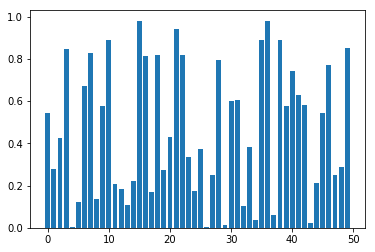

--------------------------------------------------------
[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333 0.89132195 0.20920212
 0.18532822 0.10837689 0.21969749 0.97862378 0.81168315 0.17194101
 0.81622475 0.27407375 0.43170418 0.94002982 0.81764938 0.33611195
 0.17541045 0.37283205 0.00568851 0.25242635 0.79566251 0.01525497
 0.59884338 0.60380454 0.10514769 0.38194344 0.03647606 0.89041156
 0.98092086 0.05994199 0.89054594 0.5769015  0.74247969 0.63018394
 0.58184219 0.02043913 0.21002658 0.54468488 0.76911517 0.25069523
 0.28589569 0.85239509]
--------------------------------------------------------


In [14]:
print("Actual Odds")
plt.bar(np.arange(len(JPs)),JPs)
plt.show()
print("--------------------------------------------------------")
print(JPs)
print("--------------------------------------------------------")

Assigning the value of the iterations

In [15]:
iterations = int(input("The number of iteration: "))

The number of iteration: 5000


Using the value of the iterations, slot machines and calling main function 

-------------------------------------------
Learned Odds with decaying value of epsilon
-------------------------------------------


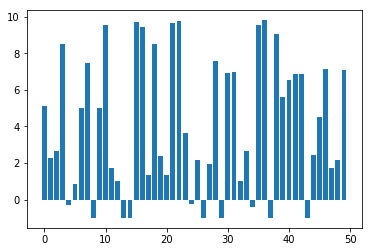

[ 5.11  2.3   2.67  8.5  -0.31  0.83  5.    7.46 -1.    5.    9.54  1.75
  1.   -1.   -1.    9.73  9.42  1.36  8.53  2.38  1.36  9.68  9.74  3.63
 -0.21  2.14 -1.    1.93  7.56 -1.    6.94  7.    1.    2.67 -0.39  9.54
  9.81 -1.    9.04  5.6   6.56  6.86  6.86 -1.    2.44  4.5   7.13  1.75
  2.14  7.11]
Reward: 44731


In [16]:
print("-------------------------------------------")
print ("Learned Odds with decaying value of epsilon")
print("-------------------------------------------")
learned_payout_odds, reward = multi_armed_bandit(number_of_slot_machines, iterations)
plt.bar(np.arange(len(learned_payout_odds)), learned_payout_odds)
plt.show()
print(np.round(learned_payout_odds,2))
print("Reward:", sum(reward))

-If we compare these results with the ones that we had obtained when epsilon value was 0.1, 0 or 1 we could analyze there was a lot of exploration at first
-Then the algorithm had exploited slot machines more evidently by selecting the best available options
-The reward value is pretty high but its less as compared to the results when epsilon was 0.1
-All we can say higher cumulative rewards